We will be working with a dataset based on housing prices in Ames, Iowa. This version of the dataset has some missing values filled for convenience. 

#### Predictor 
* SalePrice: the property's sale price in dollars 

#### Features 
* a lot of features 


In [3]:
from __future__ import print_function 
import os 
data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class3/data']


### Question 1 
* Import the data using Pandas and examine the shape. There are 79 features columns plus the predictor, the sale price (SalePrice). 
* There are three different types: integers (int64), floats(float64), and strings (object, categoricals).  Examine how many there are of each data type. 

In [4]:
# Q1a - Import the data 
import pandas as pd 
import numpy as np

filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep = ',')

data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [5]:
# Returns counts of each data type 
data.dtypes.value_counts() 

object     43
float64    21
int64      16
dtype: int64

In [6]:
data.shape

(1379, 80)

### Question 2 
Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is n-1, where n is the number of categories 

In [7]:
# Q2a - number of features that would be present if all string (object) 
# features are one-hot encoded 

# Select the columns that are type object (ie. string)
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]
print(len(categorical_cols))

data[categorical_cols].head()

43


,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


In [8]:
# Determine how many extra columns 
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique()) # number of unique values 
                .sort_values(ascending = False))

# No need to encode if there is only one value 
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# subtract 1 category from every column b/c number of one-hot 
# is n-1 (one less than number of categories)
small_num_ohc_cols -= 1 

small_num_ohc_cols.sum() # 215 categories 
print (small_num_ohc_cols)


Neighborhood     24
Exterior2nd      15
Exterior1st      13
SaleType          8
Condition1        8
HouseStyle        7
RoofMatl          7
Condition2        7
Functional        6
BsmtFinType2      6
FireplaceQu       5
Foundation        5
RoofStyle         5
SaleCondition     5
BsmtFinType1      5
Heating           5
GarageType        5
BsmtExposure      4
Electrical        4
Fence             4
GarageCond        4
GarageQual        4
BsmtQual          4
LotConfig         4
MSZoning          4
MiscFeature       4
BldgType          4
HeatingQC         4
KitchenQual       3
LandContour       3
BsmtCond          3
LotShape          3
MasVnrType        3
ExterQual         3
ExterCond         3
PoolQC            3
Alley             2
GarageFinish      2
LandSlope         2
PavedDrive        2
CentralAir        1
Street            1
Utilities         1
dtype: int64


### Question 3 
Let's create a new data set where all the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results. 
* Use the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding 
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column. 
* For the data that are not one-hot encoded, drop the columns that are string categoricals. 

For the first step, numerically encoding the string categoricals, either Scikit-learn's `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each cateogory, and we are going to one-hot encode all the numerical values anyway. 

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np 

# Q3a - create a separate copy of dataframe for one-hot encoding 
data_ohc = data.copy()

le = LabelEncoder()
ohc = OneHotEncoder()

# Q3b - one-hot encode each column and add it back to the dataframe, 
# drop original column 
for col in num_ohc_cols.index:
    
    # Integer encode string categories 
    dat = le.fit_transform(data_ohc[col]).astype(np.int)    
        # [ 5 24  5 ...,  6 12  7]...
    
    # Remove the original column from the dataframe 
    data_ohc = data_ohc.drop(col, axis = 1)
    
    # Ohe hot encode the data--this returns a sparse array 
    new_dat = ohc.fit_transform(dat.reshape(-1,1)) 
        # 1379 integer arrays (i.e. [5], [24],...)
    
    # Create unique column names 
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
        # ['Neighborhood_0', 'Neighborhood_1', 'Neighborhood_2'...]
    
    # Create the new dataframe 
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index = data_ohc.index, 
                          columns = col_names )
        # Each feature adds n-1 columns to original data
        # Neighborhood_0  Neighborhood_1  Neighborhood_2  Neighborhood_3...
        # 0    0.0             0.0             0.0             0.0   
        # 1    0.0             0.0             0.0             0.0  
    
    # Append the new data to the dataframe 
    data_ohc = pd.concat([data_ohc, new_df], axis = 1)
    
data_ohc.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LandSlope_2,PavedDrive_0,PavedDrive_1,PavedDrive_2,CentralAir_0,CentralAir_1,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [10]:
# Column difference between original and new data, should be 215 
data_ohc.shape[1]-data.shape[1]

215

In [11]:
# Q3c - for data not one-hot encoded, drop string categorical 
# columns (num_ohc_cols)

# print(data.shape[1]) # 80 

# Remove the string columns from the dataframe 
data = data.drop(num_ohc_cols.index, axis = 1)

print(data.shape)

(1379, 37)


### Question 4 
* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits. 
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why? 



In [12]:
from sklearn.model_selection import train_test_split 

# Q4a - Train and test splits of ohc and non-ohc dataset, use same random_state
y_col = 'SalePrice' 

# Split the non ohc data 
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Split the ohc data 
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                                   test_size = 0.3, 
                                                                   random_state = 42)

# Compare the indices of ohc and non-ohc data to ensure they are identical 
(X_train_ohc.index == X_train.index).all()


True

In [13]:
# Q4b - Fit a basic linear regression model on the training data 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values 
error_df = list() 

# Non-ohc data 
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred), 
                           'test': mean_squared_error(y_test, y_test_pred)}, 
                          name = 'no enc'))

# ohc data 
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

print (error_df)

# Assemble the results 
error_df = pd.concat(error_df, axis = 1)
error_df

[test     1.372182e+09
train    1.131507e+09
Name: no enc, dtype: float64, test     1.821125e+19
train    3.177311e+08
Name: one-hot enc, dtype: float64]


,no enc,one-hot enc
test,1.372182e+09,1.821125e+19
train,1.131507e+09,3.177311e+08


One-hot encoded data has higher error in training data because of overfitting

### Question 5 
For each of the data sets (one-hot encoded and not encoded): 
* Scale all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`. 
* Compare the error calculated on the test sets 
Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on ONLY the training data, but then apply it to both the train and test data identically 


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test), 
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)
}

# Get the list of float columns, and the float data so that we don't scale 
# something we already scaled. We're supposed to scale the original data each
# time 
mask = X_train.dtypes == np.float # boolean 
float_columns = X_train.columns[mask]

float_columns


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

In [18]:
# initialize model 
LR = LinearRegression() 

errors = {} # errors dictionary to compare different scalers 

# iterate over all possible combinations and get the errors 
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items(): 
    
    # this sets scaler_label = dict.key, scaler = dict.value 
    for scaler_label, scaler in scalers.items(): 
    
        trainingset = _X_train.copy() # copy because we don't want to scale 
        testset = _X_test.copy()      # this more than once 
        
        # scale 
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        
        # fit linear regression model
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        
        # errors for each scaler 
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)
        


In [19]:
errors = pd.Series(errors)
print (errors.to_string())

print('-' * 80)

for key, error_val in errors.items(): 
    print (key, error_val)

not_encoded - maxabsscaling          1.372024e+09
not_encoded - minmaxscaling          1.372329e+09
not_encoded - standardscaling        1.372182e+09
one_hot_encoded - maxabsscaling      8.065328e+09
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - standardscaling    8.065328e+09
--------------------------------------------------------------------------------
not_encoded - maxabsscaling 1372023689.44
not_encoded - minmaxscaling 1372329164.98
not_encoded - standardscaling 1372182358.93
one_hot_encoded - maxabsscaling 8065327607.2
one_hot_encoded - minmaxscaling 8065327607.2
one_hot_encoded - standardscaling 8065327607.25


### Question 6 
Plot preductions vs. actual for one of the models 

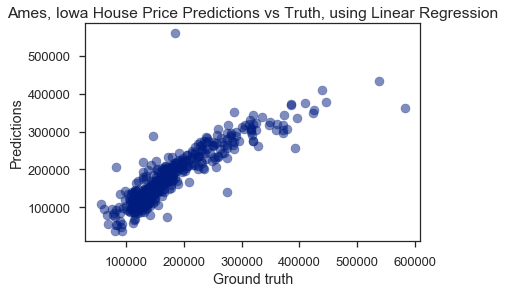

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline 

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha = 0.5)

ax.set(xlabel = 'Ground truth', ylabel = 'Predictions',
      title = 'Ames, Iowa House Price Predictions vs Truth, using Linear Regression');